In [92]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [93]:
# java_raw=pd.read_csv("java_raw.csv")
java_raw=pd.read_csv("java_raw_5k.csv")
py_raw=pd.read_csv("py_raw.csv")

In [94]:
java_raw

,mbit/s,time,imgs,mb_dl,endpoint
0,939.65,4.68,5000,549.11,http://s3.eu-west-1.amazonaws.com
1,742.26,5.73,5000,532.02,http://s3.eu-west-1.amazonaws.com
2,526.57,8.23,5000,541.91,http://s3.amazonaws.com
3,3427.08,1.30,5000,557.76,http://10.0.2.1:80
4,3606.40,1.24,5000,556.74,http://10.0.2.1:80
5,701.39,6.23,5000,546.30,http://s3.eu-west-1.amazonaws.com
6,369.57,11.58,5000,534.95,http://s3.eu-west-1.amazonaws.com
7,1037.73,4.21,5000,545.97,http://s3.amazonaws.com
8,3467.42,1.24,5000,539.18,http://10.0.2.1:80
9,1879.17,2.31,5000,543.32,http://10.0.2.1:80


In [102]:
java_s3_eu = java_raw[java_raw["endpoint"]=="http://s3.eu-west-1.amazonaws.com"].reset_index()

In [110]:
font_size=20
params = {'legend.fontsize': font_size,
          'figure.figsize': (15, 10),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size}

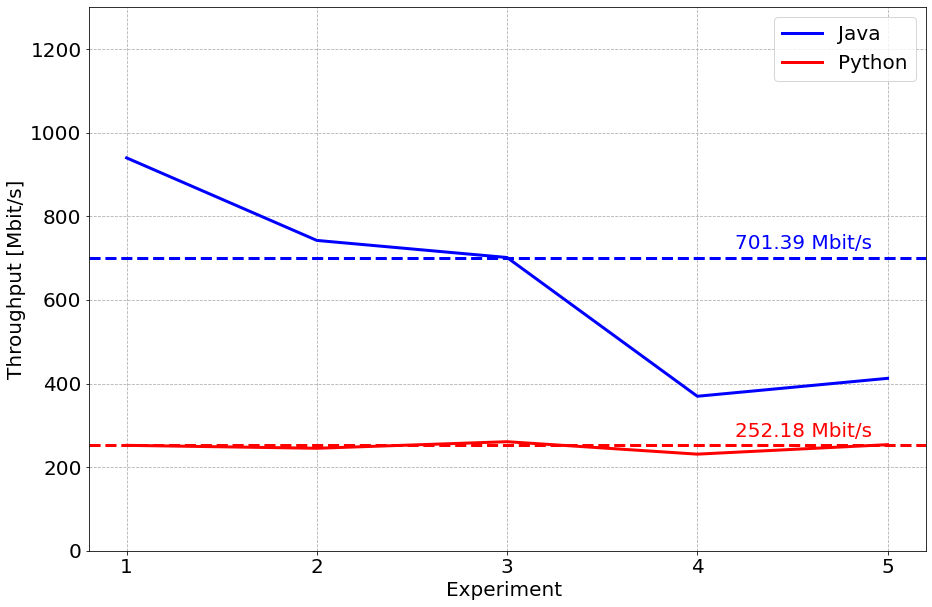

In [124]:
plt.rcParams.update(params)
_linewidth=3

fig, ax = plt.subplots()
ax.plot(java_s3_eu["mbit/s"][:-1], linewidth=_linewidth, label="Java", color="b")
ax.plot(py_raw["throughput_mbitps"], linewidth=_linewidth, label="Python", color="r")

ax.set_ylabel("Throughput [Mbit/s]")
ax.set_xlabel("Experiment ")
ax.set_xticks(range(len(py_raw)), range(1, len(py_raw)+1))
ax.set_ylim([0, 1300])
ax.legend()

java_median = np.median(java_s3_eu["mbit/s"][:-1])
python_median = np.median(py_raw["throughput_mbitps"])

ax.axhline(y=java_median, color='b',linewidth=_linewidth,linestyle='--')
ax.axhline(y=python_median, color='r',linewidth=_linewidth,linestyle='--')

ax.text(3.2, java_median+20, f"{round(java_median, 2)} Mbit/s", fontsize=font_size, color="b")
ax.text(3.2, python_median+20, f"{round(python_median, 2)} Mbit/s", fontsize=font_size, color="r")

ax.grid(linestyle="--", which="both")
fig.savefig(f"py-vs-java.pdf", bbox_inches='tight')

In [115]:
java_s3_eu["mbit/s"].min()

369.57